In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from itertools import combinations

In [3]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

print("✅ Iris dataset loaded successfully!")
print("Features:", feature_names)
print("Target Classes:", class_names)
print("First five samples:\n", X[:5])

✅ Iris dataset loaded successfully!
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Classes: ['setosa' 'versicolor' 'virginica']
First five samples:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [4]:
plot_colors = "ryb"   # red, yellow, blue for 3 classes
plot_step = 0.02

In [5]:
pairs = list(combinations(range(4), 2))
print("\nFeature pairs for visualization:", pairs)


Feature pairs for visualization: [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]


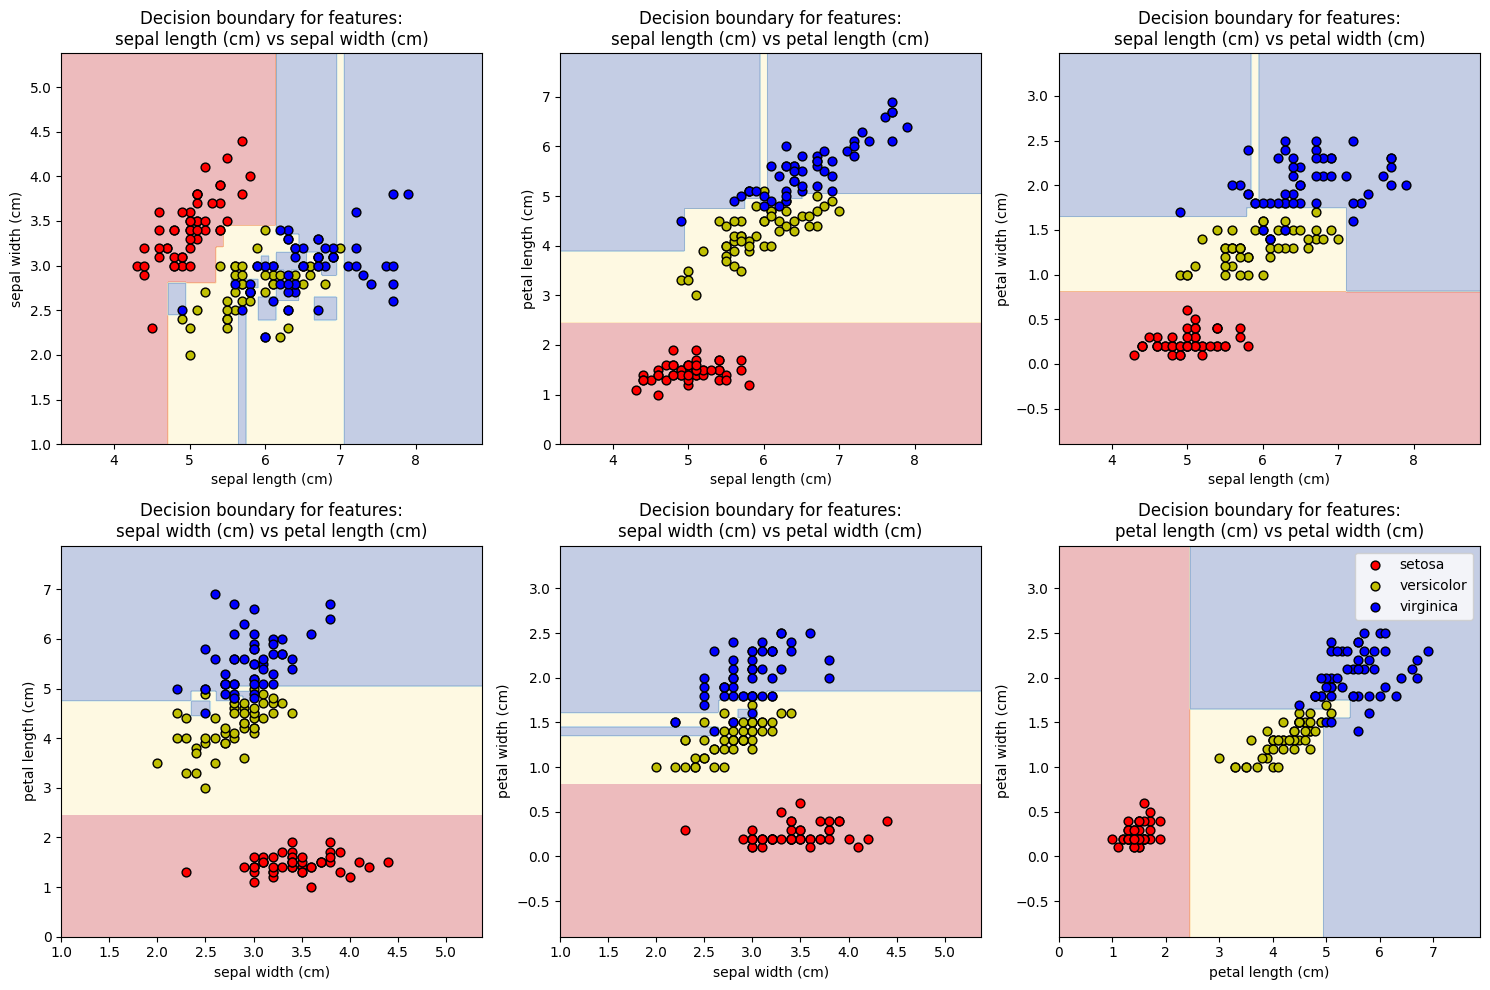

In [6]:
plt.figure(figsize=(15, 10))
for i, pair in enumerate(pairs):
    # Select only two features
    X_pair = X[:, pair]

    # Train Decision Tree model
    clf = DecisionTreeClassifier().fit(X_pair, y)

    # Create mesh grid for plotting
    x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
    y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    # Predict class for each grid point
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot contour (decision regions)
    plt.subplot(2, 3, i + 1)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)

    # Plot training data points
    for idx, color in enumerate(plot_colors):
        plt.scatter(X_pair[y == idx, 0], X_pair[y == idx, 1],
                    label=class_names[idx], c=color, edgecolor='k', s=40)

    plt.xlabel(feature_names[pair[0]])
    plt.ylabel(feature_names[pair[1]])
    plt.title(f"Decision boundary for features:\n{feature_names[pair[0]]} vs {feature_names[pair[1]]}")

plt.tight_layout()
plt.legend()
plt.show()


In [7]:
clf_all = DecisionTreeClassifier(random_state=42)
clf_all.fit(X, y)


DecisionTreeClassifier(random_state=42)

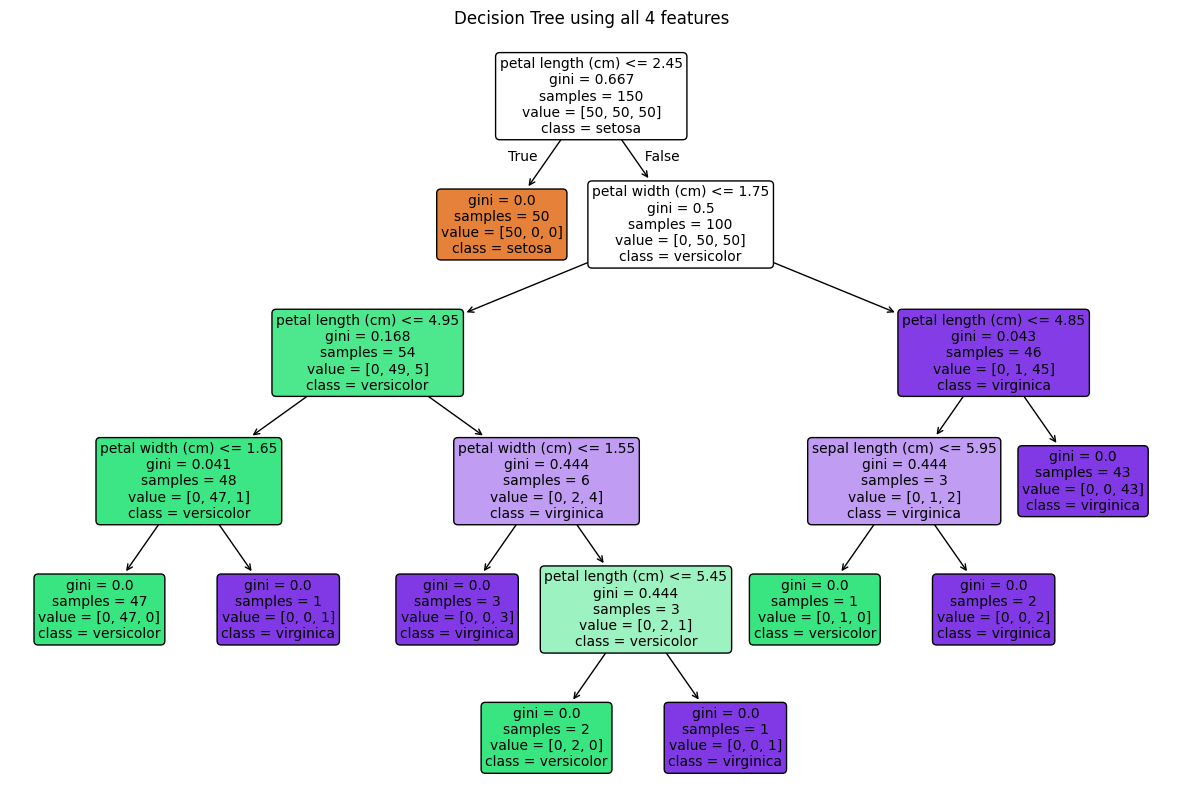

In [8]:
plt.figure(figsize=(15, 10))
plot_tree(
    clf_all,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree using all 4 features")
plt.show()